<h1 align='center'>From REST to data frame - interacting with REST APIs using Python </h1>

<h4 align='center'>Laura Gutierrez Funderburk (@LGFunderburk) </h4>


<img src="api.png" alt="Drawing" style="width: 200px;float: right;"/>


<em>In this talk we will explore the Python libraries `requests`, `json`, `pandas` and `plotly` to interact with data from a REST API,format the data into a data frame and create interactive plots. </em>


<h2 align='center'> Overview </h2>

- Introductions: I tell you about myself, I learn about you 

- What is an API?

- What forms part of an API?

- Why (and when) use an API?

- What is REST API?

- Where to find public APIs?

- Time to code: the Internet Archive & Age of Empires II

- Q&A

<h2 align='center'> What is an API? </h2>

An API (application programming interface) is a collection of programming code whose task is to facilitate data transmission between one software product and another. This transmission is bound to terms determined by the code.

![](https://lh6.googleusercontent.com/_nYCLkTG8PO_Wx5-jkdIq3Wyo1PBGrh4wiincNkb5cnZijpxfzCclyxMJbNwYItS8T3Iao-Cqm5WphPy4d4Mlihszki6MBiqZA7NBwTnuFxU49ppZEZyv8v0QEEVAA9Ai3buwhG7)

<em>How API works. Source: Medium</em>


<h2 align='center'>What forms part of an API?</h2>

APIs consist of two main components:

- Technical specification: this component describes data exchange options between two actors -  request for processing and delivery protocols.

- Software interface written to the specification that represents it (web browser + interface, for example).

<h2 align='center'> Why (and when) use APIs? </h2>

- When looking for data - there are millions of APIs online which provide access to data. 
- Data changes regularly (stock price data) - need mechanism that allows to update data as needed a CSV format can be cumbersome, takes a lot of bandwidth and it is slow.
- You want a small subset of the data. 
- There is repeated computation involved.



<h2 align='center'> What is a REST API?</h2>

* A REST API (also referred to as a RESTful web service or RESTful API)  is an architectural style for an API that uses HTTP requests to access and use data (think url).

* Based on representational state transfer (REST). This style and approach to communications often used in web services development.

* REST uses less bandwidth $\Rightarrow$ more suitable for efficient internet usage. 

* REST APIs can also be built with programming languages such as JavaScript or Python (though we won't explore how to do this in this meetup).

<h2 align='center'>Commands a REST API uses</h2>

A REST API uses commands to obtain resources. The state of a resource at any given timestamp is called a resource representation. A REST API uses existing HTTP methodologies defined by the RFC 2616 protocol, such as:

* GET: retrieve a resource.
* PUT: change the state of or update a resource, which can be an object, file or block.
* POST: create that resource.
* DELETE to remove it.

<b>In this meetup, we will focus on using GET.</b>

<h2 align='center'>API Status Codes</h2>

Whenever we make a request to a web server, we get status codes. These codes encode information on the success of a request. Here are some codes that are relevant to GET requests:

* 200: get request was successful. 
* 301: redirection to a different endpoint (new domain name, new endpoint name). 
* 400: a bad request (not sending right data, errors in request).
* 401: Many APIs require login credentials, this code indicates right credentials have not been sent. 
* 403: Forbidden: you don’t have the right permissions to see it.
* 404: The resource you tried to access wasn’t found on the server.
* 503: The server is not ready to handle the request.

<h2 align='center'> Where to find public (REST) APIs? </h2>

Many cities worldwide have a portal with open data - i.e. look up Ireland open data.

GitHub has compiled a list of public APIs https://github.com/public-apis/public-apis

<h2 align='center'>Code time</h2>

We will explore two APIs from that list: the Internet Archive (PHP based) and an API hosted using Heroku that contains data on Age of Empires II. 

Both can be accessed via a URL, however "queries" have a different structure on each. You should expect you will need to spend time getting familiar with a database's API documentation before you can get started running queries. This holds true for REST APIs as well. 

<h2 align='center'>Python libraries we will use</h2>

In [1]:
import requests
from requests.exceptions import HTTPError
import json
import pandas as pd
import plotly.express as px

<h2 align='center'>Our query-performing function</h2>

In [60]:
def query_entry_pt(url):
    """This function takes as input a URL entry point and returns the complete JSON response in a REST API
    
    Input:
        - url(string): complete url (or entry point) pointing at server 
        
    Output:
        - jsonResponse(json object): JSON response associated wtih query
    
    """
    try:
        # Using GET command 
        response = requests.get(url)
        # Raise issues if response is different from 200
        response.raise_for_status()
        # access JSOn content
        jsonResponse = response.json()
        print("Success!",response)
        return jsonResponse

    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}')

<h2 align='center'>Let's try getting information from a non-existent API</h2>

In [61]:
# API that does not exist
url_no_api = "http://api.open-notify.org/this-api-doesnt-exist"
query_entry_pt(url_no_api)

HTTP error occurred: 404 Client Error: Not Found for url: http://api.open-notify.org/this-api-doesnt-exist


In [123]:
# Web page that is NOT an API
url_no_api = "https://en.wikipedia.org/wiki/Main_Page"
query_entry_pt(url_no_api)

Other error occurred: Expecting value: line 1 column 1 (char 0)


## The Internet Archive

About: Internet Archive is a non-profit library of millions of free books, movies, software, music, websites, and more.

Source https://archive.org/advancedsearch.php 

In [125]:
# API (should) but we made a mistake in the query
url_archive='https://archive.org/services/search/v1/scrape?fields=title,month,year,downloads&q=collection%nasa'
query_entry_pt(url_archive)

HTTP error occurred: 500 Server Error: Internal Server Error for url: https://archive.org/services/search/v1/scrape?fields=title,month,year,downloads&q=collection%25nasa


In [63]:
# API returns information
url_nasa='https://archive.org/services/search/v1/scrape?fields=title,month,year,downloads,collection&q=collection%3Anasa'
jsonResponse_nasa=query_entry_pt(url_nasa)

Success! <Response [200]>


In [64]:
# Keys 
jsonResponse_nasa.keys()

dict_keys(['items', 'count', 'cursor', 'total'])

<h2 align='center'>Formatting the data using pandas</h2>

In [126]:
jsonResponse_nasa

{'items': [{'month': 3,
   'year': '2000',
   'downloads': 569,
   'collection': ['nasa', 'stennisspacecentercollection'],
   'title': 'International Space Station exhibit',
   'identifier': '00-042-154'},
  {'month': 2,
   'year': '2000',
   'downloads': 151,
   'collection': ['nasa', 'stennisspacecentercollection'],
   'title': 'Swamp to Space historical exhibit',
   'identifier': '00-042-32'},
  {'month': 2,
   'year': '2000',
   'downloads': 183,
   'collection': ['nasa', 'stennisspacecentercollection'],
   'title': 'Naval Meteorology and Oceanography Command exhibit entrance',
   'identifier': '00-042-43'},
  {'month': 1,
   'year': '2000',
   'downloads': 118,
   'collection': ['nasa', 'stennisspacecentercollection'],
   'title': 'Test Control Center exhibit',
   'identifier': '00-042-56'},
  {'month': 5,
   'year': '2000',
   'downloads': 4634,
   'collection': ['nasa', 'stennisspacecentercollection'],
   'title': 'Space Shuttle Cockpit exhibit',
   'identifier': '00-042-71'},
 

<h2 align='center'>Formatting the data using pandas</h2>


In [65]:
# Format as a data frame
pd.json_normalize(jsonResponse_nasa)

,items,count,cursor,total
0,"[{'month': 3, 'year': '2000', 'downloads': 569...",5000,W3siaWRlbnRpZmllciI6IjE5OTgtTC0wMTIwOCJ9XQ==,205579


In [124]:
# Format as a data frame
flattened_nasa = pd.json_normalize(jsonResponse_nasa,record_path='items')

flattened_nasa.head()

,month,year,downloads,collection,title,identifier
0,3,2000,569,"[nasa, stennisspacecentercollection]",International Space Station exhibit,00-042-154
1,2,2000,151,"[nasa, stennisspacecentercollection]",Swamp to Space historical exhibit,00-042-32
2,2,2000,183,"[nasa, stennisspacecentercollection]",Naval Meteorology and Oceanography Command exh...,00-042-43
3,1,2000,118,"[nasa, stennisspacecentercollection]",Test Control Center exhibit,00-042-56
4,5,2000,4634,"[nasa, stennisspacecentercollection]",Space Shuttle Cockpit exhibit,00-042-71


<h2 align='center'>Cleaning the data using pandas</h2>


In [128]:
#[item for item in flattened_nasa['collection'] if 'jsc-pao-video-collection' in item]
flattened_nasa['collection']= flattened_nasa["collection"].str[0]

In [129]:
flattened_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       5000 non-null   int64 
 1   year        4986 non-null   object
 2   downloads   5000 non-null   int64 
 3   collection  5000 non-null   object
 4   title       5000 non-null   object
 5   identifier  5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


<h2 align='center'>Visualizing some data using Plotly</h2>


In [140]:
# audiocollection, nasa, jsc-pao-video-collection
subset = flattened_nasa[flattened_nasa['collection']=='langleyresearchcentermediaarchive']

px.scatter(data_frame=subset,x='year',y='downloads',hover_name='title',title='Number of times an item was visited')

### Learning about McDonnell Douglas Experimental Winglets on DC 10 


See https://archive.org/details/1981-L-12090

On May 25, 1979, the McDonnell Douglas DC-10-10 that operated the flight, took off from runway 32R only tocrash after the left engine detached. The crash resulted in the death of 258 passengers and 13 crew members on board, in addition to two people on the grouns. This is the deadliest aviation accident to have occurred in the United States.


----> Downloads indicates the number of times an item has been viewed, and does not reflect number of visits at any given time, only the total up to date. 

### Learning about the most visited video produced by NASA

In [130]:
subset = flattened_nasa[flattened_nasa['collection']=='jsc-pao-video-collection']

px.scatter(data_frame=subset,x='year',y='downloads',hover_name='title',title='Number of times an item was visited')

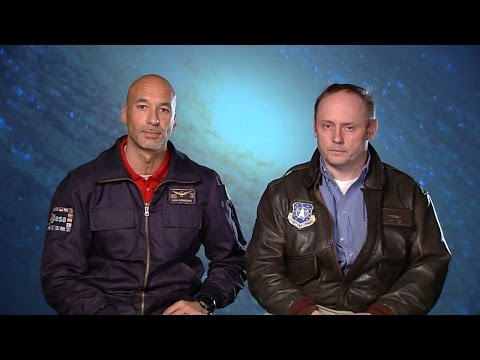

In [94]:
# Video posted Feb 27, 2015
from IPython.display import YouTubeVideo

YouTubeVideo('2AwUnkrqNyw', width=800, height=300)

## Different APIs are structured differently

#### Refer to the documentation!



## Age Of Empires II API

Simple API to retrieve resources related to Age of Empires II. The base URL for retrieving the resources is /api/v1

Source https://age-of-empires-2-api.herokuapp.com/docs/#/ 

In [119]:
# Age of Empires entry points
entry_point = 'https://age-of-empires-2-api.herokuapp.com/api/v1/'
aoe_civ=entry_point + 'civilizations'

# Perform queries
jsonResponse_tech=query_entry_pt(aoe_civ)

# Flaten JSON response
flattened_civ = pd.json_normalize(jsonResponse_civ,record_path='civilizations')



Success! <Response [200]>


In [120]:
print("Civilizations")
display(flattened_civ.head())

Civilizations


,id,name,expansion,army_type,unique_unit,unique_tech,team_bonus,civilization_bonus
0,1,Aztecs,The Conquerors,Infantry and Monk,[https://age-of-empires-2-api.herokuapp.com/ap...,[https://age-of-empires-2-api.herokuapp.com/ap...,Relics generate +33% gold,"[Villagers carry +5, Military units created 15..."
1,2,Britons,Age of Kings,Foot Archer,[https://age-of-empires-2-api.herokuapp.com/ap...,[https://age-of-empires-2-api.herokuapp.com/ap...,Archery Ranges work 20% faster,[Town Centers cost -50% wood upon reaching the...
2,3,Byzantines,Age of Kings,Defensive,[https://age-of-empires-2-api.herokuapp.com/ap...,[https://age-of-empires-2-api.herokuapp.com/ap...,Monks +50% heal speed,[Buildings (except gates) have +10% HP in Dark...
3,4,Celts,Age of Kings,Infantry,[https://age-of-empires-2-api.herokuapp.com/ap...,[https://age-of-empires-2-api.herokuapp.com/ap...,Siege Workshops work 20% faster,"[Infantry moves 15% faster, Lumberjacks work 1..."
4,5,Chinese,Age of Kings,Archer,[https://age-of-empires-2-api.herokuapp.com/ap...,[https://age-of-empires-2-api.herokuapp.com/ap...,Farms provide +45 food,[Start game with 3 extra villagers but -50 woo...


## Let's take a look at technologies


In [106]:
print("Technologies")
# Perform queries
aoe_tech = entry_point +  'technologies'
jsonResponse_civ=query_entry_pt(aoe_civ)
# Normalize 
flattened_tech = pd.json_normalize(jsonResponse_tech,record_path='technologies')

display(flattened_tech.head())

Technologies
Success! <Response [200]>


,id,name,description,expansion,age,develops_in,build_time,applies_to,cost.Food,cost.Gold,cost.Wood,cost.Enemy Villager,cost.Stone
0,1,Crossbowman,Upgrade to Crossbowman,Age of Kings,Castle,https://age-of-empires-2-api.herokuapp.com/api...,35,[https://age-of-empires-2-api.herokuapp.com/ap...,125.0,75.0,NaN,NaN,NaN
1,2,Thumb Ring,Faster reload time (10-20%) and 100% accuracy,Age of Kings,Castle,https://age-of-empires-2-api.herokuapp.com/api...,45,[https://age-of-empires-2-api.herokuapp.com/ap...,300.0,NaN,250.0,NaN,NaN
2,3,Arbalest,Upgrade to Arbalest,Age of Kings,Imperial,https://age-of-empires-2-api.herokuapp.com/api...,50,[https://age-of-empires-2-api.herokuapp.com/ap...,350.0,300.0,NaN,NaN,NaN
3,4,Elite Skirmisher,Upgrade to Elite Skirmisher,Age of Kings,Imperial,https://age-of-empires-2-api.herokuapp.com/api...,50,[https://age-of-empires-2-api.herokuapp.com/ap...,NaN,160.0,250.0,NaN,NaN
4,5,Heavy Cavalry Archer,Upgrade to Cavalry Archer,Age of Kings,Imperial,https://age-of-empires-2-api.herokuapp.com/api...,50,[https://age-of-empires-2-api.herokuapp.com/ap...,900.0,500.0,NaN,NaN,NaN


In [136]:
px.scatter(data_frame=flattened_tech,x='build_time',y='cost.Food',color='age',hover_name='name',
          labels={"build_time":"Build time","cost.Food":"Food cost"},
          title='Cost vs build time of technologies (colored by age)')

In [135]:
px.violin(data_frame=flattened_tech,x='age',y='build_time',points='all',hover_name='name',
         labels={"age":"Age","build_time":"Build time"}, title="Violin plot: Built time per age")

## Let's take a look at structures

In [110]:
print("Structures")
# Perform query
aoe_stru = entry_point + 'structures'
jsonResponse_stru=query_entry_pt(aoe_stru)
# Normalize 
flattened_stru = pd.json_normalize(jsonResponse_stru,record_path='structures')
display(flattened_stru.head())

Structures
Success! <Response [200]>


,id,name,expansion,age,build_time,hit_points,line_of_sight,armor,special,cost.Wood,reload_time,range,attack,cost.Stone,cost.Gold
0,1,Barracks,Age of Kings,Dark,50,1200,5.0,0/7,[Garrison: 10 created units],175.0,NaN,NaN,NaN,NaN,NaN
1,2,Dock,Age of Kings,Dark,35,1800,5.0,0/7,[Garrison: 10 created units],150.0,NaN,NaN,NaN,NaN,NaN
2,3,Farm,Age of Kings,Dark,15,480,NaN,0/0,"[Standard = 175 Food, Horse Collar = 250 Food,...",60.0,NaN,NaN,NaN,NaN,NaN
3,4,Fish Trap,Age of Kings,Dark,53,50,1.0,0/0,[Gives 715 Food],100.0,NaN,NaN,NaN,NaN,NaN
4,5,House,Age of Kings,Dark,25,900,1.0,0/7,[Supports 5 population],30.0,NaN,NaN,NaN,NaN,NaN


In [137]:
px.histogram(data_frame=flattened_stru,y='build_time',x='age',
            title='Build time per age',labels={"age":"Age","build_time":"total build time"})

In [138]:
px.box(data_frame=flattened_stru,y='hit_points',x='age',points='all',hover_name='name',
            title='Hit points per age',labels={"age":"Age","hit_points":"Hit points"})

<h2 align='center'>What did we explore?</h2>

* We learned about APIs, and in particular REST APIs - this interface allows us to interact with the data on a server, 

* We learned about different status codes returned based on the response 

* Although REST API base their architecture on HTTP, structure of queries differs across different entry points and servers

* We learned how we can use the requests library to GET data

* We parsed JSON response using pandas 

* We visualized data using Plotly



<h2 align='center'>Q & A</h2>


![](https://lh6.googleusercontent.com/_nYCLkTG8PO_Wx5-jkdIq3Wyo1PBGrh4wiincNkb5cnZijpxfzCclyxMJbNwYItS8T3Iao-Cqm5WphPy4d4Mlihszki6MBiqZA7NBwTnuFxU49ppZEZyv8v0QEEVAA9Ai3buwhG7)

<h1 align='center'>Thank you! </h1>


<img src="api.png" alt="Drawing" style="width: 200px;float: right;"/>

<h4 align='center'>Laura Gutierrez Funderburk (@LGFunderburk) </h4>